# SUPER STORE ANALYSIS

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [43]:
plt.style.use('ggplot')

In [44]:
df = pd.read_csv("SampleSuperstore.csv")

In [45]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
df.shape

(9994, 13)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [48]:
#CHECKING FOR DUPLICATES
df.duplicated().sum()

np.int64(17)

In [49]:
df = df.drop_duplicates()

In [50]:
df.shape

(9977, 13)

In [51]:
df["Profit Margin"] = df["Profit"] / df["Sales"]

In [52]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,0.1600
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820,0.3000
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,0.4700
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310,-0.4000
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,0.1125


In [53]:
df["Loss Flag"] = df["Profit"].apply(lambda x: "Loss" if x < 0 else "Profit")

In [54]:
df[["Profit", "Loss Flag"]].head()

,Profit,Loss Flag
0,41.9136,Profit
1,219.5820,Profit
2,6.8714,Profit
3,-383.0310,Loss
4,2.5164,Profit


In [55]:
def discount_level(x):
    if x == 0:
        return "No Discount"
    elif x <= 0.2:
        return "Low"
    elif x <= 0.5:
        return "Medium"
    else:
        return "High"

df["Discount Level"] = df["Discount"].apply(discount_level)

In [56]:
df[["Discount", "Discount Level"]].head(10)

,Discount,Discount Level
0,0.00,No Discount
1,0.00,No Discount
2,0.00,No Discount
3,0.45,Medium
4,0.20,Low
5,0.00,No Discount
6,0.00,No Discount
7,0.20,Low
8,0.20,Low
9,0.00,No Discount


In [57]:
df.groupby("Category")["Sales"].sum().sort_values(ascending=False)

Category
Technology         836154.0330
Furniture          741305.3133
Office Supplies    718735.2440
Name: Sales, dtype: float64

In [58]:
df.groupby("Region")["Profit"].sum().sort_values(ascending=False)

Region
West       108328.8371
East        91506.3092
South       46749.4303
Central     39653.8752
Name: Profit, dtype: float64

In [59]:
df.groupby("Discount Level")["Profit"].sum().sort_values(ascending=False)

Discount Level
No Discount    320841.4365
Low            100754.7755
Medium         -58804.9459
High           -76552.8143
Name: Profit, dtype: float64

In [60]:
df[["Discount", "Profit"]].corr()

,Discount,Profit
Discount,1.000000,-0.219661
Profit,-0.219661,1.000000


In [61]:
#FOR WHITE BACKGROUND, REMOVE THE GRIDLINES FROM THE CHART, CLEAN BORDERS AND CONSISTENT FONT SIZING
plt.style.use("default")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"
plt.rcParams["axes.edgecolor"] = "#333333"
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["xtick.labelsize"] = 9
plt.rcParams["ytick.labelsize"] = 9


In [72]:
output_folder = "charts"
os.makedirs(output_folder, exist_ok=True)

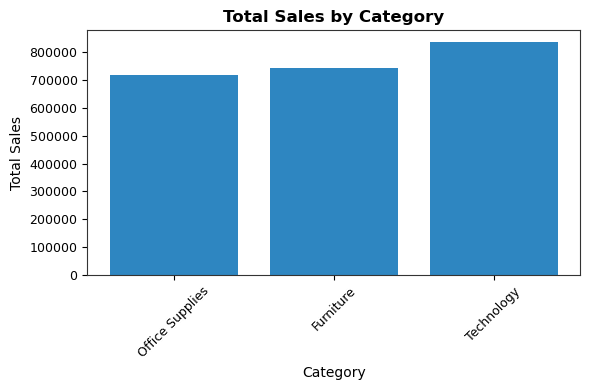

In [78]:
sales_by_category = df.groupby("Category")["Sales"].sum().sort_values()

plt.figure(figsize=(6,4))
plt.bar(sales_by_category.index, sales_by_category.values, color="#2E86C1")

plt.title("Total Sales by Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig("charts/total_sales_by_category.png", dpi=300, bbox_inches="tight")
plt.show()

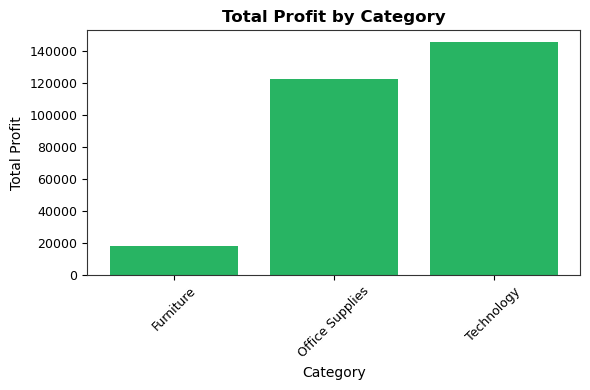

In [77]:
profit_by_category = df.groupby("Category")["Profit"].sum().sort_values()

plt.figure(figsize=(6,4))
plt.bar(profit_by_category.index, profit_by_category.values, color="#28B463")

plt.title("Total Profit by Category")
plt.xlabel("Category")
plt.ylabel("Total Profit")

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig("charts/total_profit_by_category.png", dpi=300, bbox_inches="tight")
plt.show()

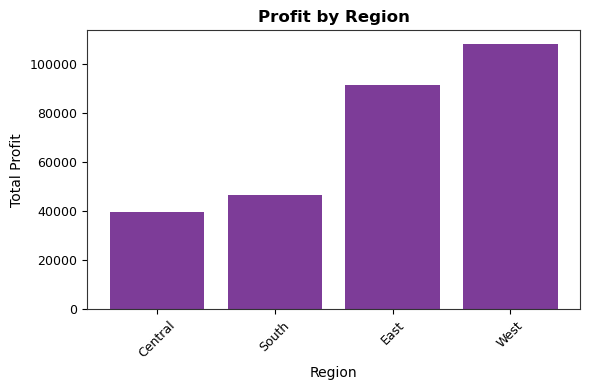

In [76]:
profit_by_region = df.groupby("Region")["Profit"].sum().sort_values()

plt.figure(figsize=(6,4))
plt.bar(profit_by_region.index, profit_by_region.values, color="#7D3C98")

plt.title("Profit by Region")
plt.xlabel("Region")
plt.ylabel("Total Profit")

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig("charts/profit_by_region.png", dpi=300, bbox_inches="tight")
plt.show()

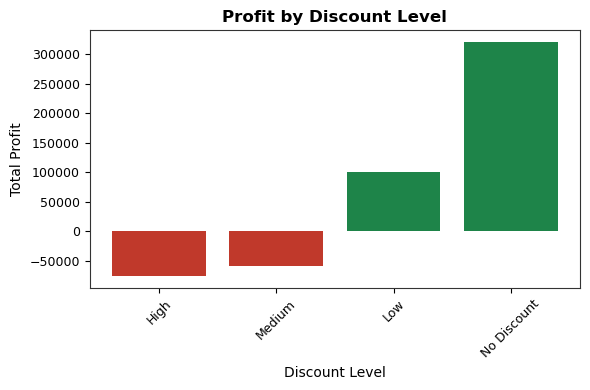

In [75]:
profit_by_discount = df.groupby("Discount Level")["Profit"].sum().sort_values()

colors = ["#C0392B" if x < 0 else "#1E8449" for x in profit_by_discount.values]

plt.figure(figsize=(6,4))
plt.bar(profit_by_discount.index, profit_by_discount.values, color=colors)

plt.title("Profit by Discount Level")
plt.xlabel("Discount Level")
plt.ylabel("Total Profit")

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig("charts/profit_by_discount_level.png", dpi=300, bbox_inches="tight")
plt.show()

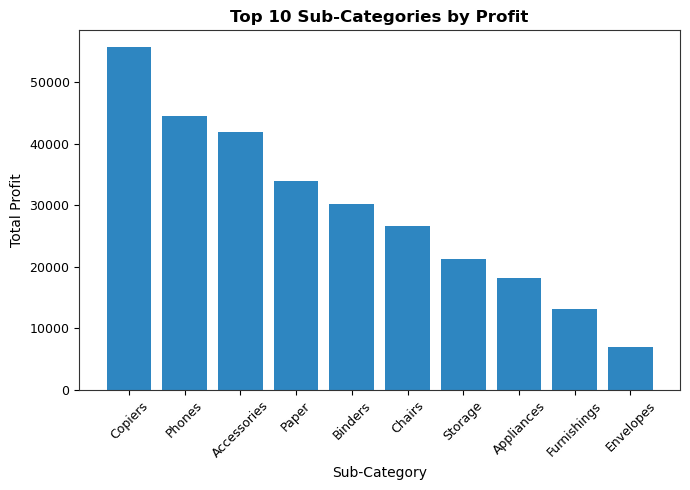

In [74]:
top_sub = df.groupby("Sub-Category")["Profit"].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(7,5))
plt.bar(top_sub.index, top_sub.values, color="#2E86C1")

plt.title("Top 10 Sub-Categories by Profit")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig("charts/top_10_subcategories_profit.png", dpi=300, bbox_inches="tight")
plt.show()

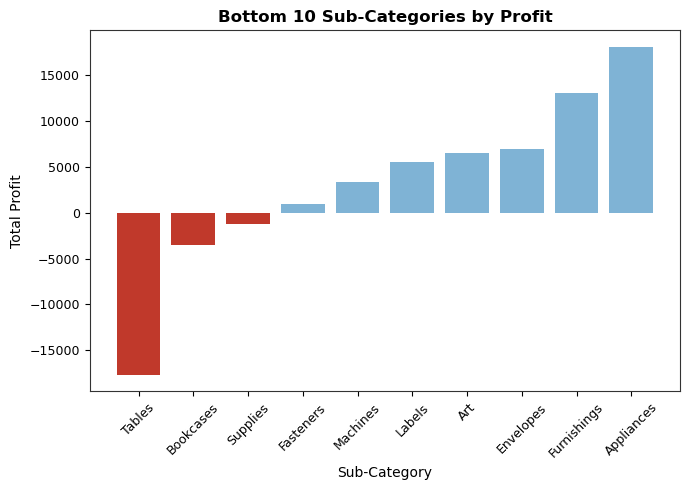

In [73]:
bottom_sub = df.groupby("Sub-Category")["Profit"].sum().sort_values().head(10)

colors = ["#C0392B" if x < 0 else "#7FB3D5" for x in bottom_sub.values]

plt.figure(figsize=(7,5))
plt.bar(bottom_sub.index, bottom_sub.values, color=colors)

plt.title("Bottom 10 Sub-Categories by Profit")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")

plt.xticks(rotation=45)
plt.grid(False)
plt.tight_layout()
plt.savefig("charts/bottom_10_subcategories_profit.png", dpi=300, bbox_inches="tight")
plt.show()